Mounted at /content/drive


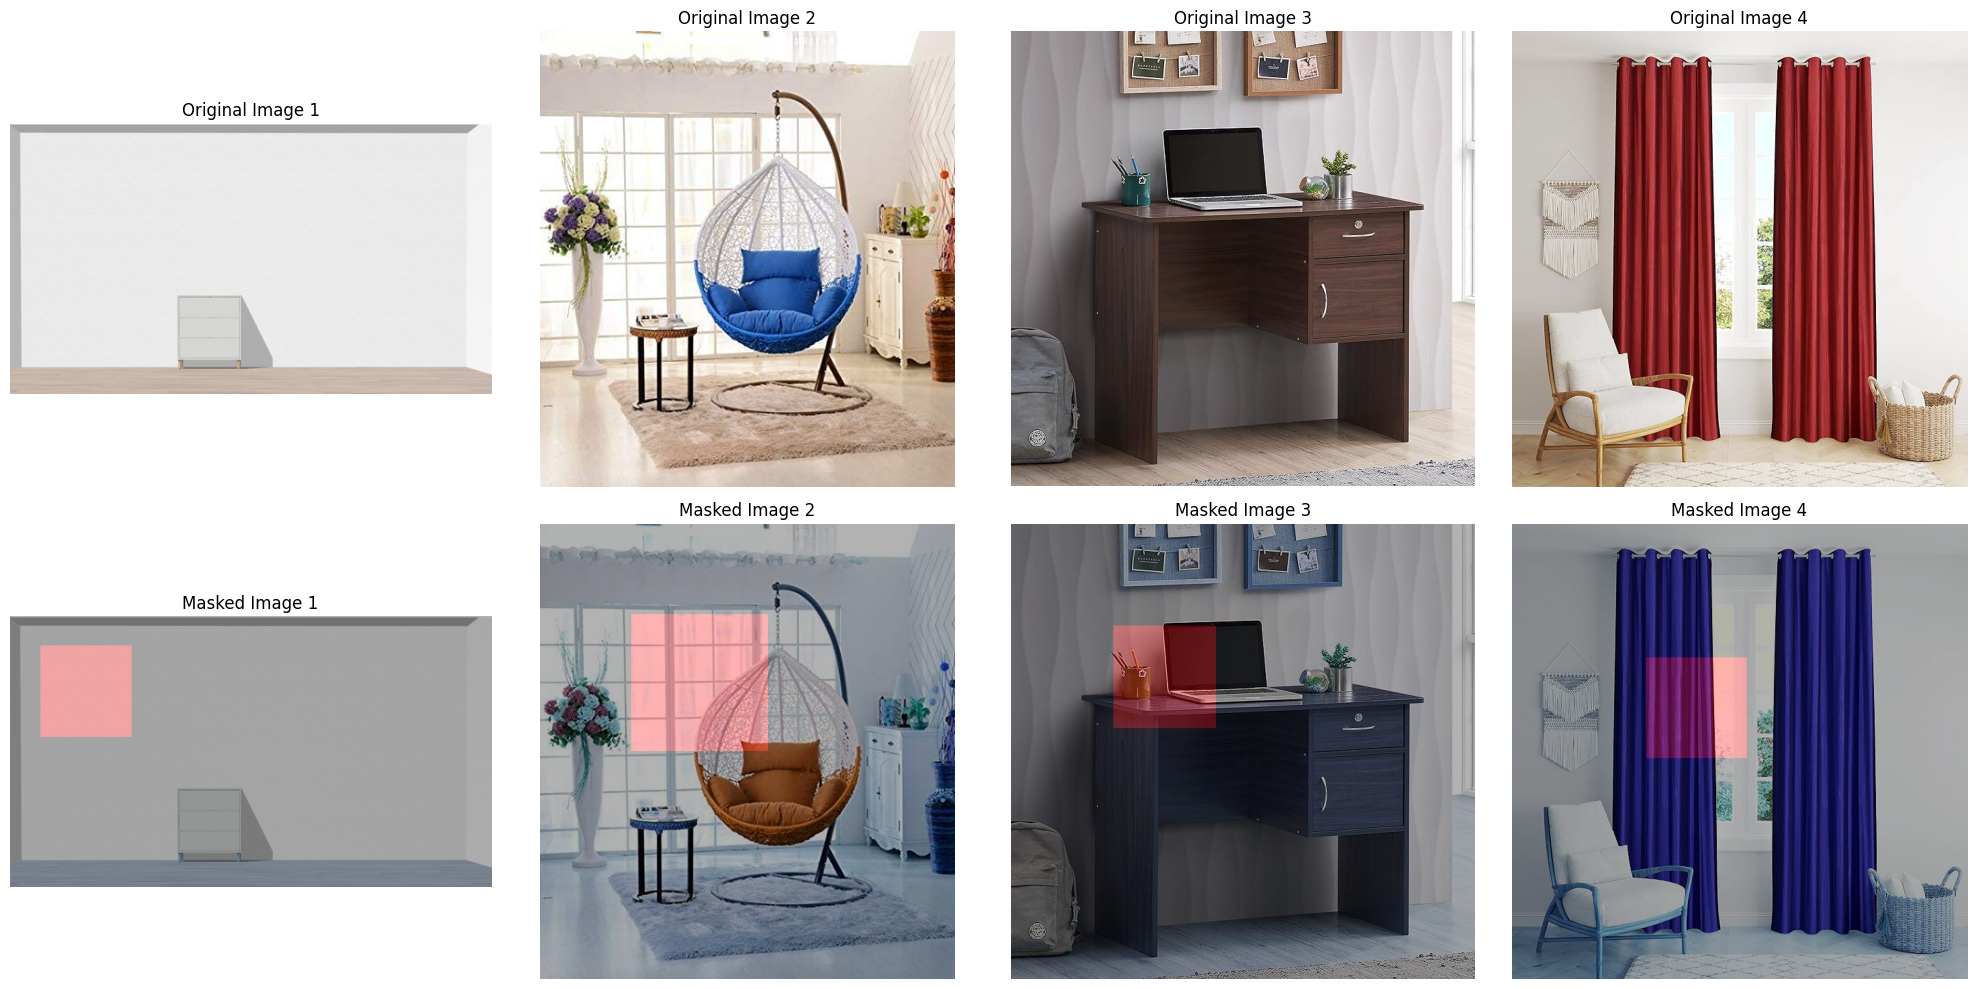

In [ ]:

!pip install opencv-python
!pip install opencv-python-headless
!pip install matplotlib


from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive', force_remount=True)


image_paths = [
    '/content/image.png',  # PNG image
    '//content/image2.jpeg',  # JPG image
    '/content/image3.jpg',  # JPG image
    '/content/image4.jpg'   # JPG image
]




images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
    else:
        images.append(image)


images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images if image is not None]


def apply_red_mask(image, mask_area):
    # Create a red mask
    red_mask = np.zeros_like(image, dtype=np.uint8)

    # Apply red color
    red_mask[mask_area] = [255, 0, 0]  \

    # the red mask
    masked_image = cv2.addWeighted(image, 0.7, red_mask, 0.3, 0)

    return masked_image

#  mask areas for each image
mask_areas = [np.zeros(image.shape[:2], dtype=bool) for image in images]


if len(mask_areas) > 0:
    mask_areas[0][50:200, 50:200] = True
if len(mask_areas) > 1:
    mask_areas[1][100:250, 100:250] = True
if len(mask_areas) > 2:
    mask_areas[2][150:300, 150:300] = True
if len(mask_areas) > 3:
    mask_areas[3][200:350, 200:350] = True

# Apply the red mask to the images
masked_images = [apply_red_mask(image, mask_area) for image, mask_area in zip(images, mask_areas)]


plt.figure(figsize=(20, 10))


for i, image_rgb in enumerate(images_rgb):
    plt.subplot(2, 4, i + 1)
    plt.title(f'Original Image {i+1}')
    plt.imshow(image_rgb)
    plt.axis('off')

# Display masked images
for i, masked_image in enumerate(masked_images):
    plt.subplot(2, 4, i + 5)
    plt.title(f'Masked Image {i+1}')
    plt.imshow(masked_image)
    plt.axis('off')

plt.tight_layout()
plt.show()




In [ ]:

!pip install opencv-python
!pip install opencv-python-headless
!pip install matplotlib
!pip install torch torchvision


!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch


drive.mount('/content/drive', force_remount=True)


model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


image_paths = [
    '/content/image.png',  # PNG image
    '//content/image2.jpeg',  # JPG image
    '/content/image3.jpg',  # JPG image
    '/content/image4.jpg'   # JPG image
]


images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
    else:
        images.append(image)


images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images if image is not None]


def apply_red_mask(image, bbox):

    x_min, y_min, x_max, y_max = map(int, bbox)


    red_mask = np.zeros_like(image, dtype=np.uint8)


    red_mask[y_min:y_max, x_min:x_max] = [255, 0, 0]


    masked_image = cv2.addWeighted(image, 0.7, red_mask, 0.3, 0)

    return masked_image


masked_images = []
for i, image in enumerate(images):

    results = model(image)


    bboxes = results.xyxy[0].cpu().numpy()[:, :4]


    for bbox in bboxes:
        image = apply_red_mask(image, bbox)

    masked_images.append(image)


plt.figure(figsize=(20, 10))


for i, image_rgb in enumerate(images_rgb):
    plt.subplot(2, 4, i + 1)
    plt.title(f'Original Image {i+1}')
    plt.imshow(image_rgb)
    plt.axis('off')


for i, masked_image in enumerate(masked_images):
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 4, i + 5)
    plt.title(f'Masked Image {i+1}')
    plt.imshow(masked_image_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()




Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 82), reused 100 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (11615/11615), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00
Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-10-4 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 123MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.